In [23]:
#import data
import pandas as pd
df=pd.read_excel("../base_lionel_recode.xlsx")

In [24]:
#define target and features
y=df['Résultat_dépistage']
X = df[df.columns[:-1]]

In [25]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.3)


In [26]:
# standardiser les données
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [27]:
# Créer une SVM avec un noyau gaussien de paramètre gamma=0.01
from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, y_train)

SVC(gamma=0.01)

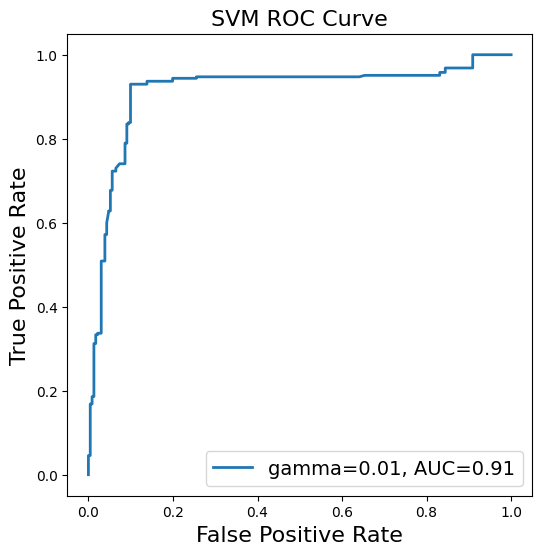

In [28]:
# prédire sur le jeu de test
y_test_pred = classifier.decision_function(X_test_std)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

In [29]:
import numpy as np
# choisir 6 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 6)

# choisir 4 valeurs pour gamma, entre 1e-2 et 10
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'C': C_range, 'gamma': gamma_range}

# critère de sélection du meilleur modèle
score = 'roc_auc'

# initialiser une recherche sur grille
grid = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), 
                                    param_grid, 
                                    cv=5, # 5 folds de validation croisée  
                                    scoring=score)

# faire tourner la recherche sur grille
grid.fit(X_train_std, y_train)

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_, grid.best_score_))

The optimal parameters are {'C': 0.1, 'gamma': 1.0} with a score of 0.99


In [30]:
from sklearn import metrics
kmatrix = metrics.pairwise.rbf_kernel(X_train_std, gamma=0.01)

In [31]:
kmatrix100 = kmatrix[:100, :100]

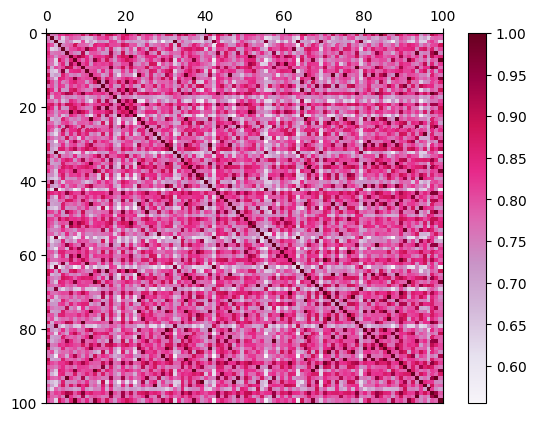

In [32]:
# dessiner la matrice
import matplotlib
plt.pcolor(kmatrix100, cmap=matplotlib.cm.PuRd) 

# rajouter la légende
plt.colorbar()

# retourner l'axe des ordonnées
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

# afficher l'image
plt.show()

In [33]:
classifier = svm.SVC(kernel='rbf', gamma=50)


In [34]:
classifier.fit(X_train, y_train)

SVC(gamma=50)

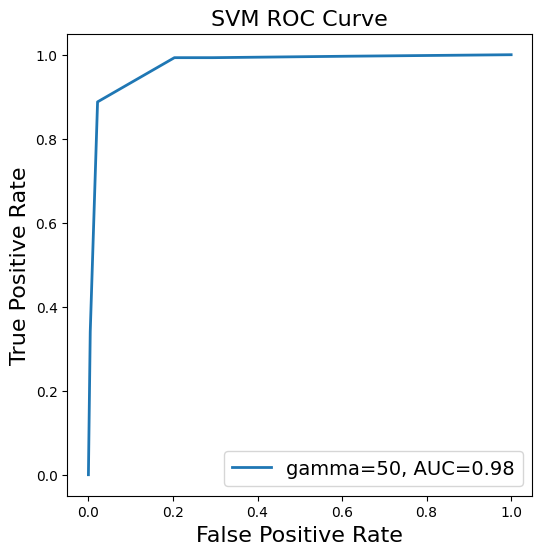

In [35]:
# prédire sur le jeu de test
y_test_pred = classifier.decision_function(X_test)
classifier.fit(X_train, y_train)
# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=50, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

In [36]:
#Nous effectuons une validation croisée

# choisir 6 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 6)

# choisir 4 valeurs pour gamma, entre 1e-2 et 10
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'C': C_range, 'gamma': gamma_range}

# critère de sélection du meilleur modèle
score = 'roc_auc'

# initialiser une recherche sur grille
grid = model_selection.GridSearchCV(svm.SVC(kernel='rbf'),
                                    param_grid,
                                    cv=5, # 5 folds de validation croisée
                                    scoring=score)

# faire tourner la recherche sur grille
grid.fit(X_train, y_train)

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_, grid.best_score_))

The optimal parameters are {'C': 0.1, 'gamma': 1.0} with a score of 0.99


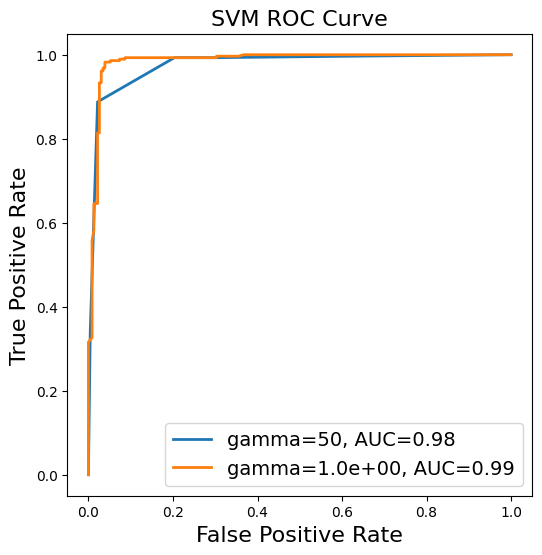

In [37]:
# prédire sur le jeu de test avec le modèle optimisé
y_test_pred_cv = grid.decision_function(X_test)

# construire la courbe ROC du modèle optimisé
fpr_cv, tpr_cv, thr_cv = metrics.roc_curve(y_test, y_test_pred_cv)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv = metrics.auc(fpr_cv, tpr_cv)

# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC précédente
plt.plot(fpr, tpr, '-', lw=2, label='gamma=50, AUC=%.2f' % auc)

# afficher la courbe ROC du modèle optimisé
plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='gamma=%.1e, AUC=%.2f' % \
         (grid.best_params_['gamma'], auc_cv))


# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

In [38]:
import plotly.graph_objects as pgo

In [39]:
#On vérifie que notre échantillon est bien équilibré
values = y.value_counts()/y.shape[0]

fig = pgo.Figure(data=[pgo.Pie(labels=['Sain','Malade'], values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=['green', 'red'], line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Distribution des ECG sains et malades",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

In [4]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.4-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached 

In [3]:
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#Nous allons créer notre premier réseau de neurones.

def initialize_model():

#Nous utilisons la fonction Sequential() qui est approprié pour notre problème. Nous ne développerons pas ici mais
#vous pouvez vous référer à la documentation de la bibliothèque Keras: https://keras.io/guides/sequential_model/
    model = models.Sequential()
#On indique à notre modèle la dimension des données d'entrées qui correspond au nombre de colonnes de X_train
    model.add(keras.Input(shape=(140)))
#On met la première couche de notre réseau de neurones. Nous avons une couche avec 140 perceptrons car nous avons
#140 colonnes dans nos données d'entrée comme dit plus haut. La fonction sigmoid est particulièrement indiqué
#pour les problèmes de classification. Nous vous encourageons à aller voir à quoi elle ressemble.
    model.add(layers.Dense(140, input_dim=2, activation='sigmoid'))
#Nous ajoutons une seconde couche car nous sommes dans un problème non linéaire comme dit dans le cours
    model.add(layers.Dense(1, activation='sigmoid'))

#Ici, nous pouvons ajouter des paramètres à notre modèle. Il faut juste retenir que "accuracy" permet d'avoir
#la précision de notre modèle et est particulièrement indiqué pour les problèmes de classification.
    model.compile(metrics=['accuracy'],
                  loss='binary_crossentropy',
                  optimizer='adam')

    return model

model = initialize_model()

In [ ]:
#"summary" appliqué à notre modèle nous permet d'avoir les paramètres qui la compose ainsi que les dimensions de
#notre échantillon à la sortie de chaque couche

model.summary()

In [ ]:
model = initialize_model()

history = model.fit(X_train,
                    y_train,
                    epochs = 50,
                    batch_size = 4,
                    verbose = 1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#On peut évaluer notre modèle
result = model.evaluate(X_test, y_test, verbose=1)

# On peut extraire la "metrics" choisie
accuracy = result[1]

print(f"La précision de notre modèle est de {round(accuracy*100,2)} %")